In [2]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

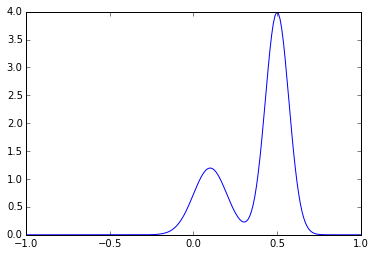

In [3]:
# define distribution function

def gauss(x, mu, sigma):
    return 1./sqrt(2*pi*sigma**2)*exp(-(x-mu)**2/(2*sigma**2))

def P(x):
    mu1, sigma1 = 0.1, 0.1
    mu2, sigma2 = 0.5, 0.07
    return gauss(x, mu1, sigma1)*0.3 + gauss(x, mu2, sigma2)*0.7

x = linspace(-1,1, 200)
plot(x, P(x)) 

In [4]:
def step(x, stepsize = 1):
    return x + random.normal(0, stepsize)

In [5]:
def metropolis(x0, step, nstep, P, stepsize):
    path = zeros((nstep,))
    xold = x0
    path[0] = x0
    accept = 0

    for i in range(1,nstep):
        xnew = step(xold, stepsize)
        r = P(xnew)/P(xold)
        A = min([1,r])
        if A > random.uniform():
            xold = xnew

            accept += 1
        path[i] = xold
    return path, float(accept)/nstep

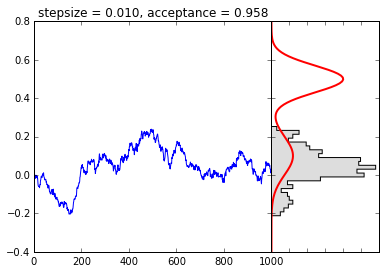

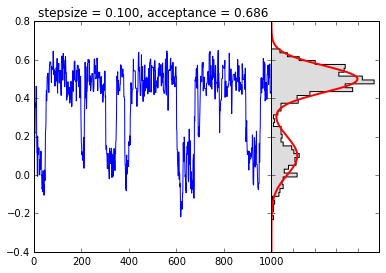

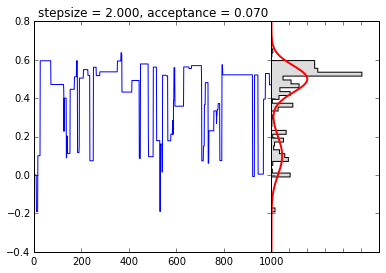

In [6]:
def step(x, stepsize = 0.1):
    return x + random.normal(0, stepsize)

def plot_path():
    figure()
    ax1 = gcf().add_axes([.15, .15, .55, .8])
    ax2 = gcf().add_axes([.70, .15, .25, .8])
    #ax2 = subplot(122)
    ax2.axes.yaxis.set_ticklabels([])
    ax2.axes.xaxis.set_ticklabels([])
    ax1.plot(path)
    ax2.hist(path, bins=linspace(-1,1,100), normed=1, orientation="horizontal", histtype="stepfilled", color="#DDDDDD")
    ax2.set_ylim([-0.4, 0.8])
    ax1.set_ylim([-0.4, 0.8])
    ax1.set_title("stepsize = %.3f, acceptance = %.3f" % (stepsize, acceptance))

    x = linspace(-1,1, 200)
    ax2.plot(P(x),x,"r", lw=2)

random.seed(12)
for stepsize in [0.01, 0.1, 2.]:
    path, acceptance = metropolis(0., step, 1000, P, stepsize=stepsize)
    plot_path()
pass

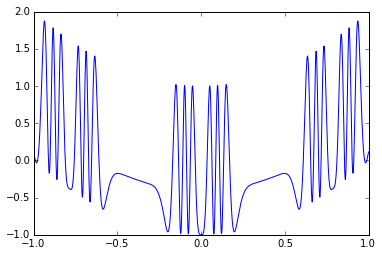

In [7]:
def E(x):
    return x**2 - cos((cos(x*4)**8-1)*20)
    
    #return x**2-cos(x*gauss(x, 0, 0.3)*200)*gauss(x, 0, 0.5)*0.4
    #return x**2-cos(x/(0.5+x**2)*200)*gauss(x, 0, 0.5)*0.4

x = linspace(-1,1, 1000)
plot(x, E(x))

In [10]:
def greedy(x0, step, nstep, E, stepsize):
    path = zeros((nstep,))
    xold = x0
    path[0] = x0
    accept = 0
    for i in range(1,nstep):
        xnew = step(xold, stepsize)
        Pnew = P(xnew)
        if E(xnew) < E(xold):
            xold = xnew
            accept += 1
        path[i] = xold
    return path, float(accept)/nstep

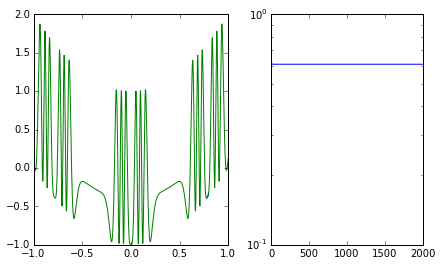

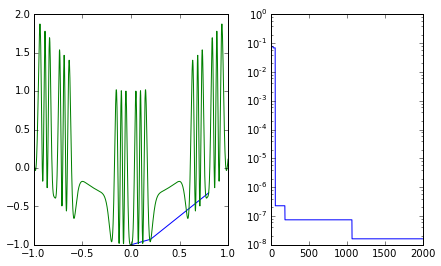

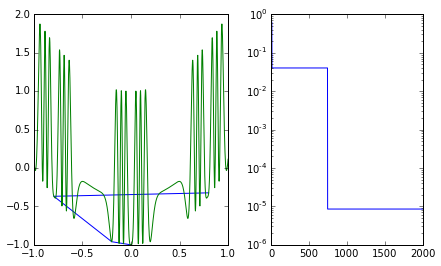

In [14]:
random.seed(1234)
def step(x, stepsize = 0.1):
    return x + random.normal(0, stepsize)

for stepsize in [0.01, 0.5, 5.]:
    path, acceptance = greedy(0.8, step, 2000, E, stepsize=stepsize)
    figure(figsize=(6,4))
    ax1 = gcf().add_axes([.15, .15, .45, .8])
    ax2 = gcf().add_axes([.70, .15, .35, .8])

    ax1.plot(path, E(path))
    x = linspace(-1,1, 1000)
    ax1.plot(x, E(x))
    ax2.semilogy(E(path)-E(0))
pass

In [15]:
def boltzmann_anneal(x0, step, nstep, E, schedule, stepsize):
    path = zeros((nstep,))
    xold = x0
    path[0] = x0
    accept = 0
    for i in range(1,nstep):
        T = schedule(i)
        xnew = step(xold, i, stepsize)
        r = exp(-(E(xnew)-E(xold))/T)
        A = min(array([1,r]))
        if A > random.uniform():
            xold = xnew
            accept += 1
        path[i] = xold
    return path, float(accept)/nstep

-c:3: RuntimeWarning: divide by zero encountered in true_divide


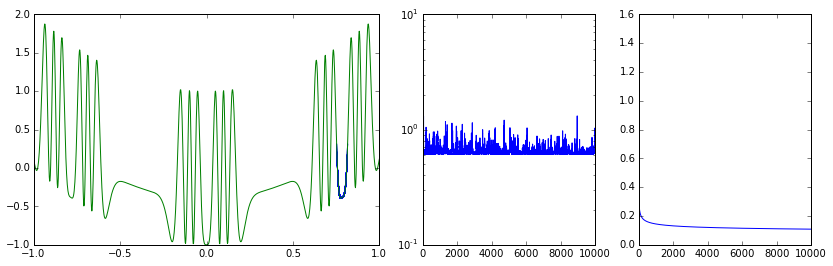

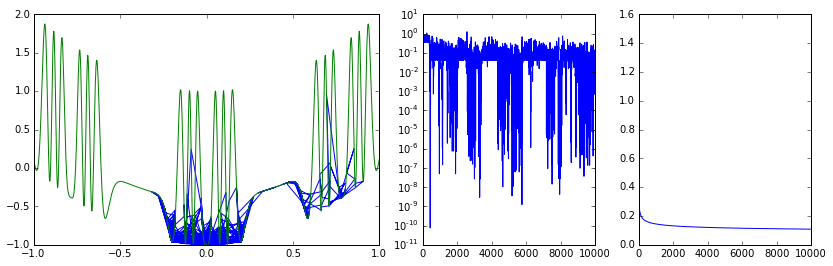

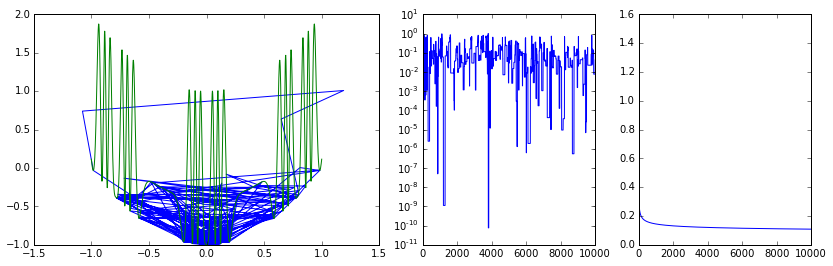

In [16]:
T0 = 1.
def schedule(k):
    return T0/log(k+1)

def step(x, k, stepsize = 0.1):
    return x + random.normal(0, stepsize*sqrt(schedule(k)))

random.seed(1234)
nstep = 10000
x0 = 0.8
for stepsize in [0.01, 0.1, 5.]:
    path, acceptance = boltzmann_anneal(x0, step, nstep, E, schedule, stepsize=stepsize)
    figure(figsize=(12,4))
    ax1 = gcf().add_axes([.10, .15, .40, .8])
    ax2 = gcf().add_axes([.55, .15, .20, .8])
    ax3 = gcf().add_axes([.80, .15, .20, .8])

    ax1.plot(path, E(path))
    x = linspace(-1,1, 1000)
    ax1.plot(x, E(x))
    ax2.semilogy(E(path)-E(0))
    ax3.plot(schedule(arange(nstep)))
pass

0.4687
0.1205
0.013


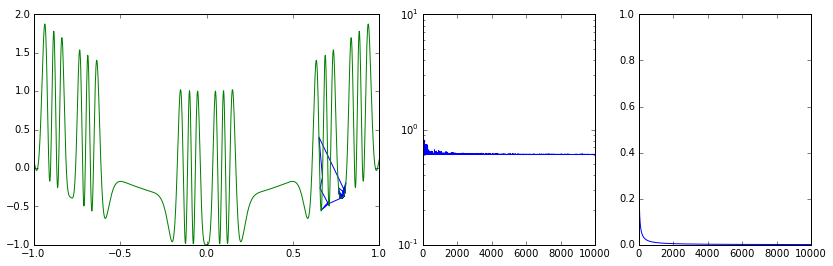

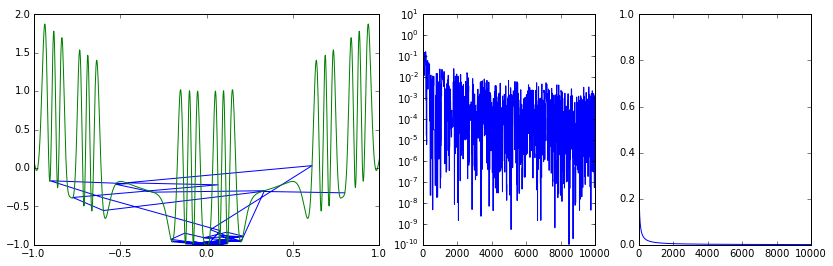

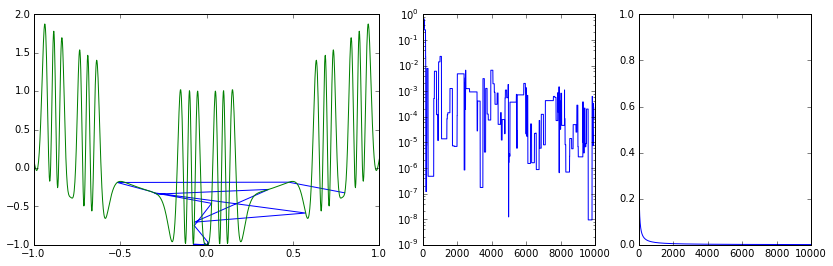

In [17]:
T0 = 10.
def schedule(k):
    return T0/(k+10)

def step(x, k, stepsize = 0.1):
    return x + random.normal(0, stepsize*sqrt(schedule(k)))

random.seed(1234)
nstep = 10000
x0 = 0.8
for stepsize in [0.1, 1, 10.]:
    path, acceptance = boltzmann_anneal(x0, step, nstep, E, schedule, stepsize=stepsize)
    print(acceptance)
    figure(figsize=(12,4))
    ax1 = gcf().add_axes([.10, .15, .40, .8])
    ax2 = gcf().add_axes([.55, .15, .20, .8])
    ax3 = gcf().add_axes([.80, .15, .20, .8])

    ax1.plot(path, E(path))
    x = linspace(-1,1, 1000)
    ax1.plot(x, E(x))
    ax2.semilogy(E(path)-E(0))
    ax3.plot(schedule(arange(nstep)))
pass

0.8643
0.6665
0.1934


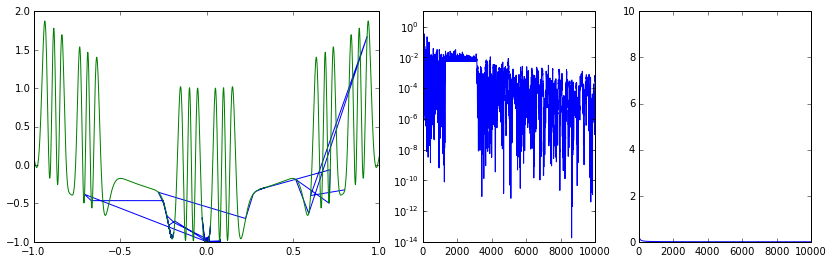

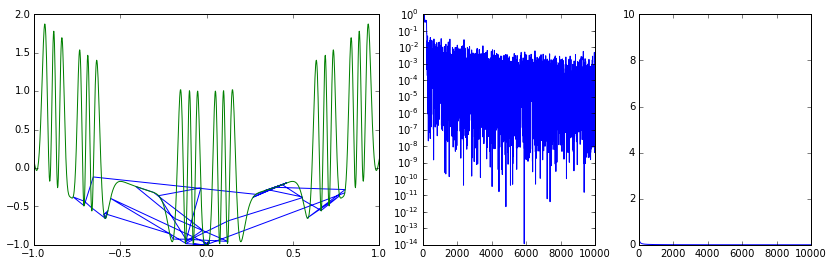

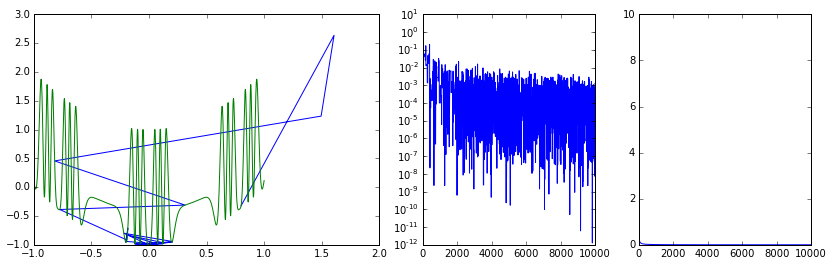

In [18]:
T0 = 10.
def schedule(k):
    return T0/(k+1)

def step(x, k, stepsize = 0.1):
    return x + random.standard_cauchy() * stepsize*(schedule(k))

random.seed(1234)
nstep = 10000
x0 = 0.8
for stepsize in [0.1, 1, 10.]:
    path, acceptance = boltzmann_anneal(x0, step, nstep, E, schedule, stepsize=stepsize)
    print(acceptance)
    figure(figsize=(12,4))
    ax1 = gcf().add_axes([.10, .15, .40, .8])
    ax2 = gcf().add_axes([.55, .15, .20, .8])
    ax3 = gcf().add_axes([.80, .15, .20, .8])

    ax1.plot(path, E(path))
    x = linspace(-1,1, 1000)
    ax1.plot(x, E(x))
    ax2.semilogy(E(path)-E(0))
    ax3.plot(schedule(arange(nstep)))
pass

0.7115
0.863
0.7985
0.7595
0.866
0.874
0.8615


-c:9: RuntimeWarning: overflow encountered in exp


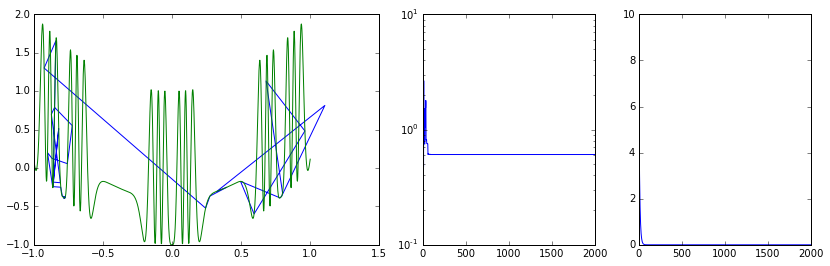

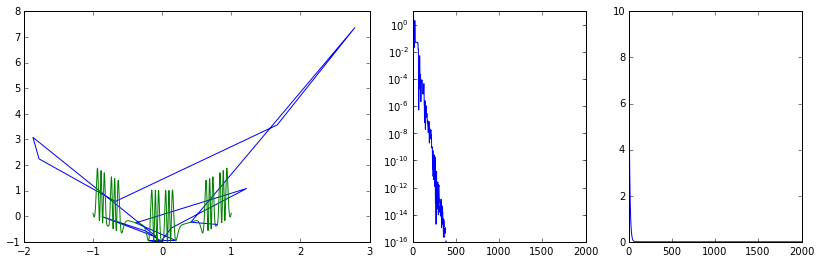

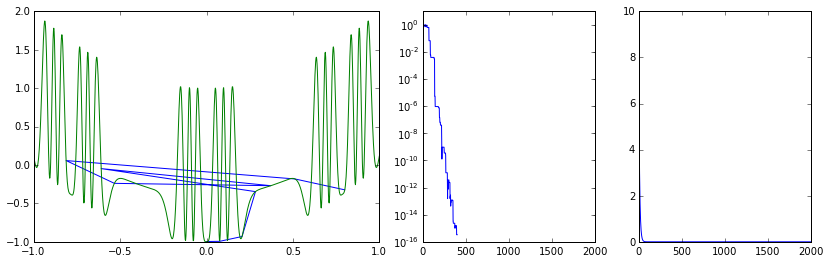

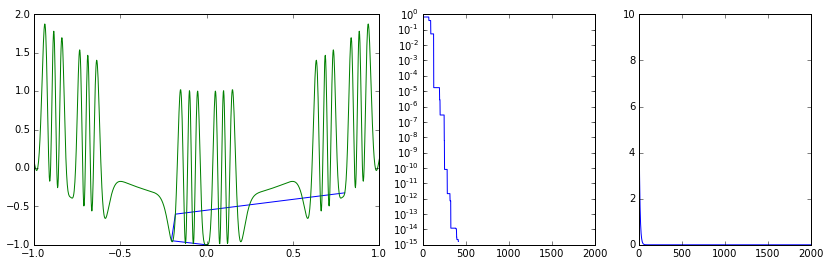

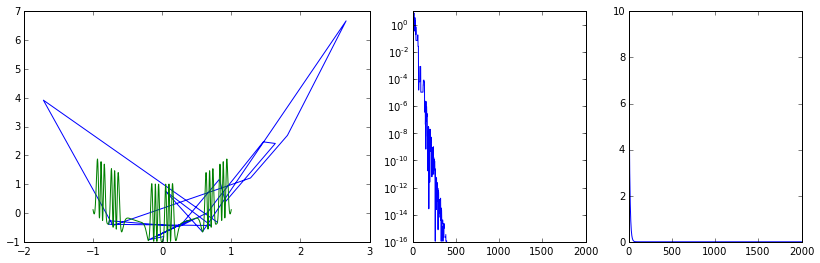

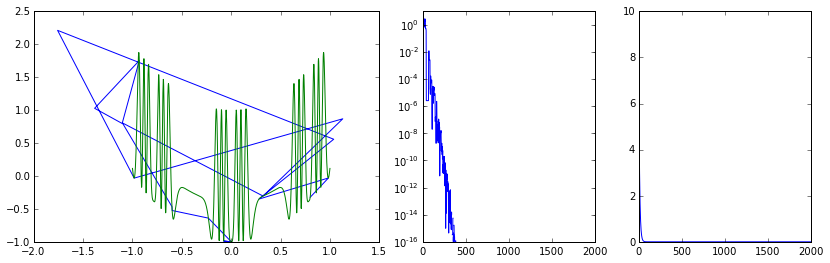

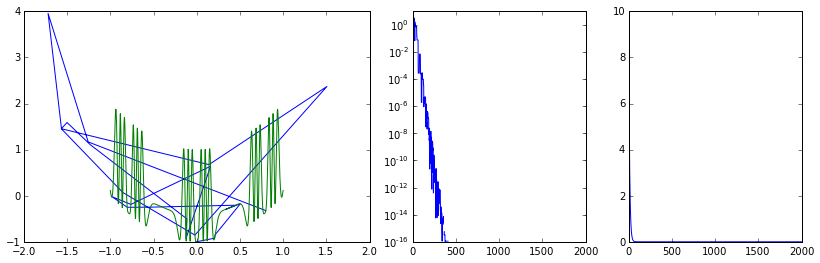

In [19]:
T0 = 10.
def schedule(k):
    eps=0.1
    return T0*exp(-k*eps)

def step(x, k, stepsize = 0.1):
    return x + random.standard_cauchy() * stepsize*sqrt(schedule(k))

random.seed(1234)
nstep = 2000
x0 = 0.8
for stepsize in [0.1, 1., 10., 100., 1., 1., 1.]:
    path, acceptance = boltzmann_anneal(x0, step, nstep, E, schedule, stepsize=stepsize)
    print(acceptance)
    figure(figsize=(12,4))
    ax1 = gcf().add_axes([.10, .15, .40, .8])
    ax2 = gcf().add_axes([.55, .15, .20, .8])
    ax3 = gcf().add_axes([.80, .15, .20, .8])

    ax1.plot(path, E(path))
    x = linspace(-1,1, 1000)
    ax1.plot(x, E(x))
    ax2.semilogy(E(path)-E(0))
    ax3.plot(schedule(arange(nstep)))
pass